# <span style="color:darkred">2. Decision Tree Ödevi (dava_sonuclari.csv)</span> 

# <span style="color:darkred">Görevler:</span>

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/Nur/Documents/dava_sonuclari.csv")

print("Eksik değerler:\n", df.isnull().sum())

Q1 = df["Case Duration (Days)"].quantile(0.25)
Q3 = df["Case Duration (Days)"].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df["Case Duration (Days)"] < (Q1 - 1.5 * IQR)) | 
          (df["Case Duration (Days)"] > (Q3 + 1.5 * IQR)))]

X = df.drop("Outcome", axis=1)
y = df["Outcome"]
X = pd.get_dummies(X, drop_first=True)


Eksik değerler:
 Case Type                     0
Case Duration (Days)          0
Judge Experience (Years)      0
Number of Witnesses           0
Legal Fees (USD)              0
Plaintiff's Reputation        0
Defendant's Wealth (USD)      0
Number of Evidence Items      0
Number of Legal Precedents    0
Settlement Offered (USD)      0
Severity                      0
Outcome                       0
dtype: int64


Yapılan kontrol sonucunda dataset’te herhangi bir eksik (NaN) değer bulunmamaktadır. Bu durum, veri temizleme sürecinde eksik değer doldurma veya silme işlemlerine gerek olmadığını göstermektedir. Verinin bütünlüğü korunmuş olup, modelleme aşamasına doğrudan geçilebilir.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall:", recall_score(y_test, y_pred, zero_division=0))
print("F1-Score:", f1_score(y_test, y_pred, zero_division=0))

Accuracy: 1.0
Precision: 0.0
Recall: 0.0
F1-Score: 0.0


Accuracy değeri %100 gibi görünse de, Precision, Recall ve F1-Score değerlerinin sıfır olması modelin sınıflar arasında dengesiz öğrenme yaptığını göstermektedir. Model, test verisinde ağırlıklı olarak “0” sınıfını tahmin etmiştir. Bu durum, veri setindeki Outcome değişkeninin büyük oranda “0” değerine sahip olmasından veya modelin sınıflar arasındaki dengesizliği yeterince öğrenememesinden kaynaklanabilir.

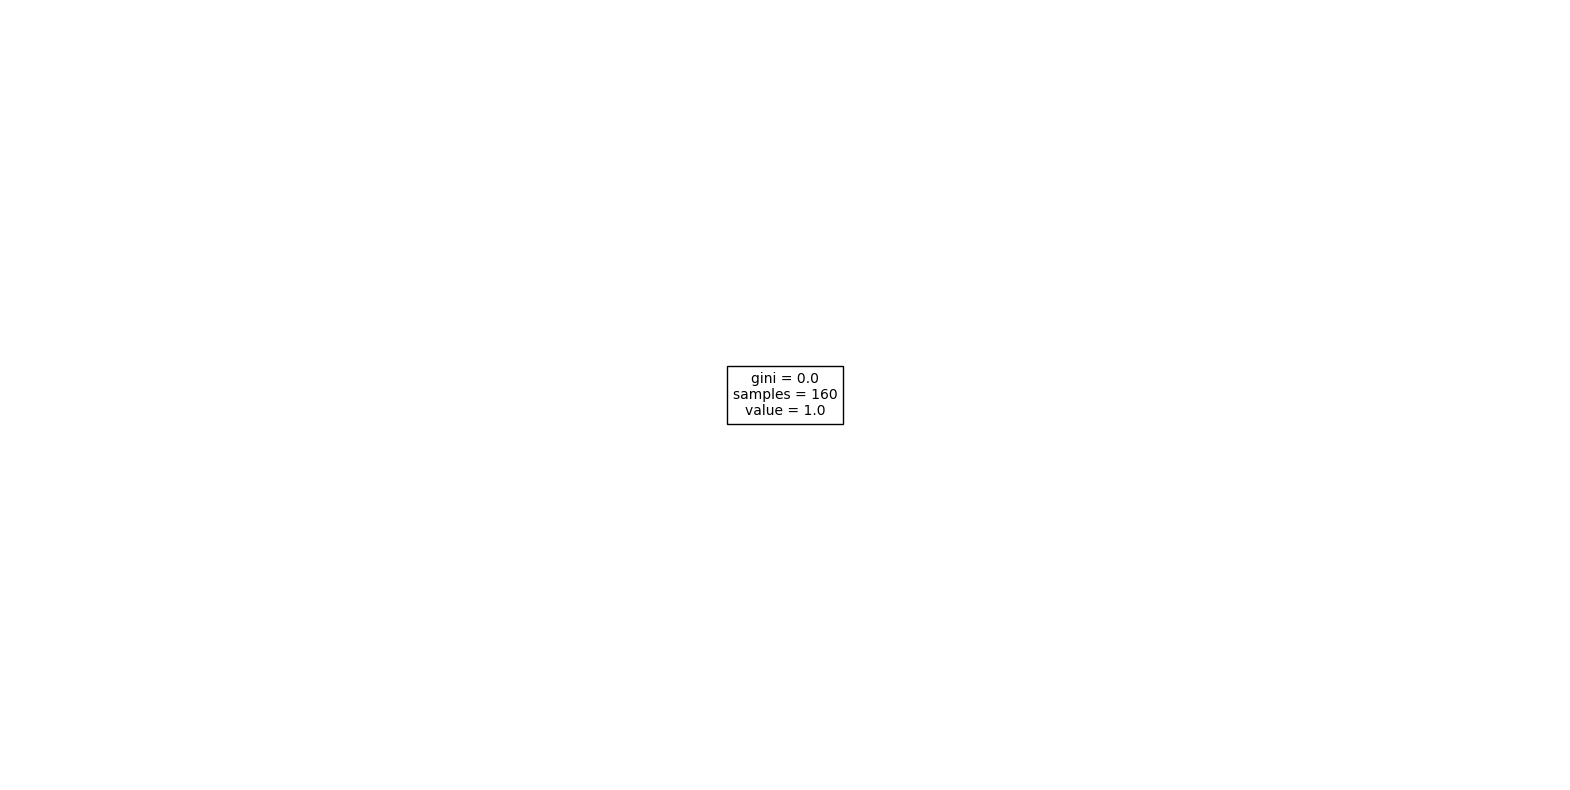

In [11]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=["0","1"], filled=True, max_depth=3, fontsize=10)
plt.show()

<span style="color:red">Analiz:</span> Karar ağacı görselleştirmesinde tek bir düğümün bulunması ve gini değerinin 0.0 olması, modelin veri setindeki sınıfları ayırt edemediğini göstermektedir. Bu durumda ağacın dallanması gerçekleşmemiştir. Dolayısıyla, karar sürecinde belirli bir özelliğin diğerlerinden daha etkili olduğunu söylemek mümkün değildir. Model tüm örnekleri tek bir sınıfa atayarak çalışmıştır. Bu durum, özellikler arasında Outcome değişkenini güçlü şekilde tahmin edecek belirgin bir ayrımın olmadığını veya veri setinde sınıf dengesizliği bulunduğunu göstermektedir.